In [ ]:
!pip install -U diffusers

## Local Inference on GPU
Model page: https://huggingface.co/diffusers/sdxl-instructpix2pix-768

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/diffusers/sdxl-instructpix2pix-768)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [ ]:
# 1️⃣ Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2️⃣ Set the working directory
import os, pathlib, PIL.Image as Image
work_dir = '/content/drive/MyDrive/sdxl'
os.chdir(work_dir)


In [ ]:
# 3️⃣ Load original image
input_path = pathlib.Path('20250813210121_112_754.jpg')
input_image = Image.open(input_path).convert('RGB')

In [ ]:
# 4️⃣ Building the InstructPix2Pix Pipeline
from diffusers import DiffusionPipeline
pipe = DiffusionPipeline.from_pretrained(
    'diffusers/sdxl-instructpix2pix-768',
    safety_checker=None,
    torch_dtype='auto'
).to('cuda')

prompt  = "This area is completely undamaged by the hurricane, which is good to see. There are elevated houses and upright trees with roads leading to them, but no visible damage from the hurricane. I would live here right now, as it is undamaged and looks pleasant to live there."

Passed `torch_dtype` torch.float32 is not a `torch.dtype`. Defaulting to `torch.float32`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'safety_checker': None} are not expected by StableDiffusionXLInstructPix2PixPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# 5️⃣ Generate a new image
from PIL import Image
w, h = input_image.size
w8, h8 = [x - x % 8 for x in (w, h)]    # Adjust to a multiple of 8

result = pipe(
    prompt=prompt,
    image=input_image,
    width=w8,
    height=h8,
).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


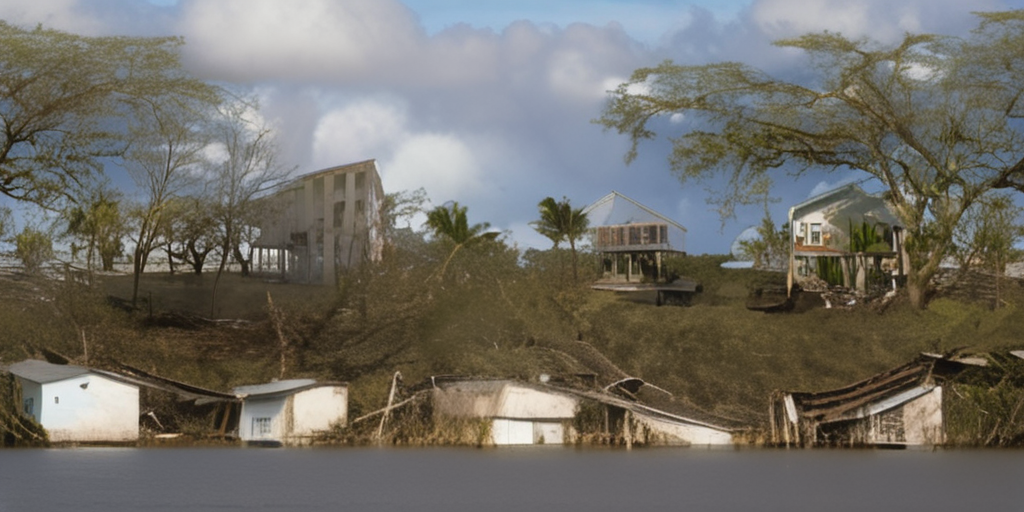

In [ ]:
result

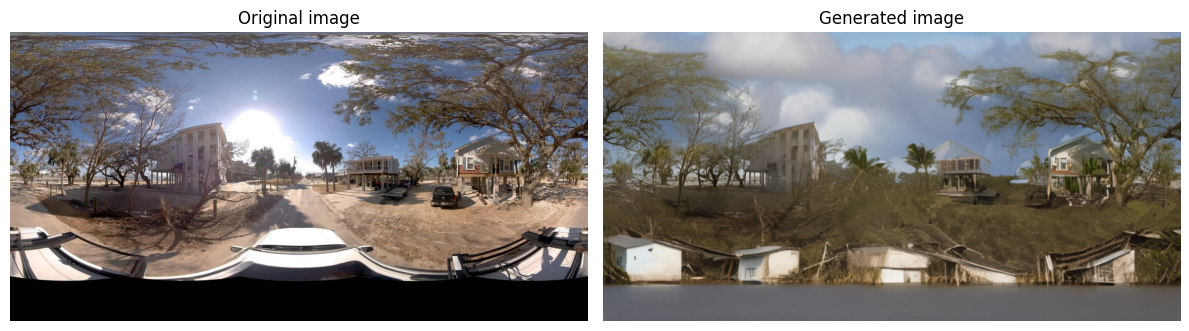

In [ ]:
# === Display: original image + generated image, side by side =======================================
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(input_image)
axs[0].set_title('Original image')
axs[0].axis('off')

axs[1].imshow(result)
axs[1].set_title('Generated image')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 6️⃣ Save the results to the same folder
output_path = pathlib.Path('output1.png')
result.save(output_path)
print(f"结果已保存到 {output_path.resolve()}")

结果已保存到 /content/drive/MyDrive/sdxl/output1.png
